In [434]:
import pandas as pd
import seaborn as sns
import numpy as np

In [435]:
from sklearn.model_selection import train_test_split

In [436]:
import warnings
warnings.filterwarnings('ignore')

In [437]:
from category_encoders.binary import BinaryEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

# Чтение данных

In [438]:
data = pd.read_csv('data.csv', delimiter=',')

In [439]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [441]:
len(X_train), len(X_test)

(97410, 32470)

In [442]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

X_y_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
58589,Female,Loyal Customer,66,Personal Travel,Eco,689,4,4,4,3,...,5,5,5,4,5,3,3,3,0.0,False
53897,Female,Loyal Customer,58,Business travel,Business,2848,1,1,4,1,...,4,4,4,4,4,5,5,0,0.0,True
120911,Male,Loyal Customer,60,Personal Travel,Eco,644,1,2,1,4,...,4,4,2,1,4,3,4,119,119.0,False
38793,Male,Loyal Customer,62,Personal Travel,Eco,1506,3,2,3,4,...,2,2,2,5,3,4,2,0,0.0,False
123403,Female,Loyal Customer,49,Business travel,Business,488,2,2,5,2,...,5,5,5,5,5,3,4,6,18.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,Female,Loyal Customer,16,Personal Travel,Eco,802,2,5,1,4,...,4,4,3,2,3,4,4,0,0.0,False
13415,Female,disloyal Customer,22,Business travel,Eco,954,3,3,3,2,...,4,3,4,5,4,3,3,0,0.0,False
126466,Male,disloyal Customer,22,Business travel,Eco,1021,1,0,0,3,...,5,4,2,4,4,5,5,269,255.0,False
31778,Male,Loyal Customer,52,Personal Travel,Eco,214,1,4,0,4,...,4,4,3,5,3,3,4,14,18.0,False


# Анализ данных

In [443]:
numeric_factors = ['Age', 'Flight Distance']

categorical_factors = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

In [444]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
y                                    False
dtype: bool

In [445]:
X_y_train['Arrival Delay in Minutes'][X_y_train['Arrival Delay in Minutes'].isna()]

86116    NaN
104975   NaN
28352    NaN
37755    NaN
107420   NaN
          ..
110935   NaN
21794    NaN
42438    NaN
26310    NaN
37095    NaN
Name: Arrival Delay in Minutes, Length: 294, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

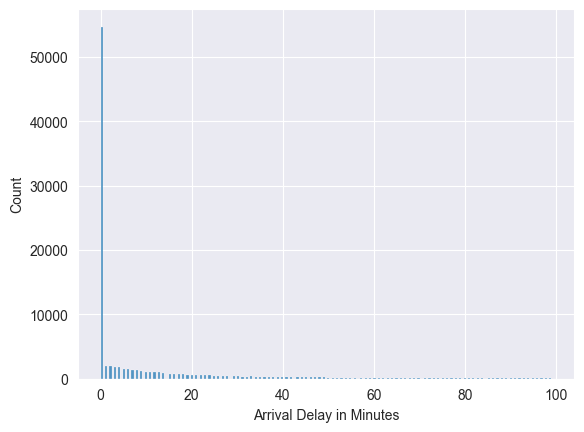

In [446]:
sns.histplot(X_y_train['Arrival Delay in Minutes'][X_y_train['Arrival Delay in Minutes'] < 100])

In [447]:
X_y_train['Arrival Delay in Minutes'] = X_y_train['Arrival Delay in Minutes'].fillna(5)

In [448]:
corr = X_y_train.corr(numeric_only=True)['y']
corr = corr[(corr > 0.1) | (corr < -0.1)]
corr 

Age                       0.133706
Flight Distance           0.298018
Inflight wifi service     0.284255
Ease of Online booking    0.168111
Food and drink            0.212328
Online boarding           0.500788
Seat comfort              0.346086
Inflight entertainment    0.396299
On-board service          0.324641
Leg room service          0.312284
Baggage handling          0.249890
Checkin service           0.240781
Cleanliness               0.306425
y                         1.000000
Name: y, dtype: float64

In [449]:
excluded_categorical_factors = ['Easy of Online booking', 'Gate location', 'Food and drink', 'Seat comfort']

categorical_factors = [x for x in categorical_factors if x not in excluded_categorical_factors]

X_y_train_useful = X_y_train[categorical_factors]
X_y_train_useful[numeric_factors] = X_y_train[numeric_factors]
X_y_train_useful['y'] = X_y_train['y']

In [450]:
gender_travel_encoder = BinaryEncoder()
gender_travel_encoder.fit(X_y_train_useful[['Gender', 'Type of Travel']])
gender_travel_encoded = gender_travel_encoder.transform(X_y_train_useful[['Gender', 'Type of Travel']])

In [451]:
X_y_train_useful = X_y_train_useful.drop(columns=['Gender', 'Type of Travel'])

In [452]:
for col in gender_travel_encoded:
    X_y_train_useful[col] = gender_travel_encoded[col]

In [453]:
target_encoded_categories = [x for x in categorical_factors if x not in ['Gender', 'Type of Travel']]

In [454]:
for col in target_encoded_categories:
    X_y_train_useful[col] = X_y_train_useful[col].astype('category')

In [455]:
X_y_train_useful.dtypes

Customer Type                        category
Class                                category
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Online boarding                      category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Cleanliness                          category
Age                                     int64
Flight Distance                         int64
y                                        bool
Gender_0                                int64
Gender_1                                int64
Type of Travel_0                        int64
Type of Travel_1                        int64
dtype: object

In [456]:
target_encoder = TargetEncoder()
target_encoder.fit(X_y_train_useful[target_encoded_categories], y=X_y_train_useful['y'])

TargetEncoder(cols=['Customer Type', 'Class', 'Inflight wifi service',
                    'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Online boarding',
                    'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Baggage handling', 'Checkin service',
                    'Cleanliness'])

In [457]:
encoded_data = target_encoder.transform(X_y_train_useful[target_encoded_categories])

In [458]:
X_y_train_useful[target_encoded_categories] = encoded_data

In [459]:
X_y_train_useful

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
58589,0.478931,0.188814,0.598998,0.388555,0.529658,0.871144,0.649973,0.648579,0.585148,0.617441,0.451814,0.431978,66,689,False,0,1,0,1
53897,0.478931,0.695778,0.328581,0.490715,0.529658,0.624104,0.611753,0.536041,0.585148,0.482733,0.615924,0.613967,58,2848,True,0,1,1,0
120911,0.478931,0.188814,0.328581,0.446312,0.381330,0.140459,0.611753,0.254788,0.202939,0.482733,0.451814,0.536145,60,644,False,1,0,0,1
38793,0.478931,0.188814,0.252912,0.446312,0.310607,0.136451,0.213257,0.254788,0.613868,0.237621,0.461432,0.212807,62,1506,False,1,0,0,1
123403,0.478931,0.695778,0.248057,0.446312,0.736329,0.140459,0.649973,0.648579,0.613868,0.617441,0.451814,0.536145,49,488,True,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,0.478931,0.188814,0.248057,0.427845,0.381330,0.140459,0.611753,0.319579,0.275841,0.237621,0.461432,0.536145,16,802,False,0,1,0,1
13415,0.243127,0.188814,0.252912,0.438977,0.310607,0.136451,0.274077,0.536041,0.613868,0.482733,0.451814,0.431978,22,954,False,0,1,1,0
126466,0.243127,0.188814,0.328581,0.483736,0.665572,0.871144,0.611753,0.254788,0.585148,0.482733,0.615924,0.613967,22,1021,False,1,0,1,0
31778,0.478931,0.188814,0.328581,0.388555,0.665572,0.570069,0.611753,0.319579,0.613868,0.237621,0.451814,0.536145,52,214,False,1,0,0,1


In [460]:
scaler = StandardScaler()
scaler.fit(X_y_train_useful.drop(columns='y'))


StandardScaler()

In [461]:
X_y_train_useful[X_y_train_useful.drop(columns='y').columns] = scaler.transform(X_y_train_useful.drop(columns='y'))

In [462]:
X_y_train_useful

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
58589,0.475013,-0.987952,0.627248,-1.385531,0.604718,1.421469,1.030337,1.284995,0.883015,1.264478,0.129452,-0.022867,1.759149,-0.502478,False,-0.984132,0.984132,-1.496764,1.496764
53897,0.475013,1.042222,-0.410313,1.628324,0.604718,0.615361,0.846679,0.606214,0.883015,0.328164,1.433245,1.142165,1.229673,1.660264,True,-0.984132,0.984132,0.668108,-0.668108
120911,0.475013,-0.987952,-0.410313,0.318388,-0.348103,-0.962802,0.846679,-1.090190,-1.372555,0.328164,0.129452,0.643974,1.362042,-0.547556,False,1.016124,-1.016124,-1.496764,1.496764
38793,0.475013,-0.987952,-0.700645,0.318388,-0.802404,-0.975881,-1.068242,-1.090190,1.052504,-1.375535,0.205858,-1.425926,1.494411,0.315938,False,1.016124,-1.016124,-1.496764,1.496764
123403,0.475013,1.042222,-0.719272,0.318388,1.932309,-0.962802,1.030337,1.284995,1.052504,1.264478,0.129452,0.643974,0.634012,-0.703826,True,-0.984132,0.984132,0.668108,-0.668108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,0.475013,-0.987952,-0.719272,-0.226427,-0.348103,-0.962802,0.846679,-0.699399,-0.942329,-1.375535,0.205858,0.643974,-1.550076,-0.389282,False,-0.984132,0.984132,-1.496764,1.496764
13415,-2.105204,-0.987952,-0.700645,0.101976,-0.802404,-0.975881,-0.775981,0.606214,1.052504,0.328164,0.129452,-0.022867,-1.152969,-0.237019,False,-0.984132,0.984132,0.668108,-0.668108
126466,-2.105204,-0.987952,-0.410313,1.422436,1.477788,1.421469,0.846679,-1.090190,0.883015,0.328164,1.433245,1.142165,-1.152969,-0.169903,False,1.016124,-1.016124,0.668108,-0.668108
31778,0.475013,-0.987952,-0.410313,-1.385531,1.477788,0.439043,0.846679,-0.699399,1.052504,-1.375535,0.129452,0.643974,0.832566,-0.978301,False,1.016124,-1.016124,-1.496764,1.496764


# Создание модели

In [463]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [464]:
X_train = X_y_train_useful.drop(columns='y')
y_train = X_y_train_useful['y']

In [465]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

In [466]:
model = LogisticRegression()

In [467]:
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_validation, y_validation))

0.9235802181858002
0.925922884244241


In [468]:
probs = model.predict_proba(X_train)
probs[:, 1]

array([0.30808225, 0.97825475, 0.97094679, ..., 0.0467483 , 0.05015071,
       0.98341329])

In [469]:
recall_score(y_train, model.predict(X_train))

np.float64(0.9083141532931867)

In [470]:
f1_score(y_train, model.predict(X_train))

np.float64(0.9116627901457255)

# Итоговая оценка качества

In [478]:
X_test_factors = X_test[categorical_factors + numeric_factors]

In [479]:
gender_type_of_travel_encoded = gender_travel_encoder\
    .transform(X_test_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_test_factors[col] = gender_type_of_travel_encoded[col]
    
X_test_useful_factors = X_test_factors.drop(columns=['Gender', 'Type of Travel'])

In [480]:
categorical_factors_encoded = target_encoder\
    .transform(X_test_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_test_useful_factors[col] = categorical_factors_encoded[col]

In [481]:
X_test_useful_factors[X_test_useful_factors.columns] = scaler.transform(X_test_useful_factors)

In [482]:
X_test_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Age,Flight Distance,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
99466,0.475013,1.042222,-0.700645,1.628324,-0.348103,-0.975881,-0.775981,-1.090190,-0.924554,-1.375535,0.205858,-0.022867,-1.748629,0.656527,1.016124,-1.016124,0.668108,-0.668108
57712,0.475013,1.042222,2.126759,-0.226427,-0.802404,1.421469,0.846679,0.606214,0.883015,0.328164,0.205858,0.643974,0.567828,1.343716,-0.984132,0.984132,0.668108,-0.668108
44248,0.475013,-0.987952,-0.700645,0.101976,-0.802404,-0.975881,1.030337,-1.090190,-0.924554,0.328164,0.129452,1.142165,-1.748629,-0.991324,-0.984132,0.984132,-1.496764,1.496764
100438,-2.105204,-0.987952,-0.719272,1.422436,-0.348103,-0.962802,1.030337,1.284995,1.052504,1.264478,1.433245,1.142165,-0.027833,-0.855088,-0.984132,0.984132,0.668108,-0.668108
17858,0.475013,-0.987952,-0.719272,-1.385531,-0.836019,-1.045887,-1.068242,0.606214,1.052504,0.328164,0.129452,-1.425926,-0.954416,-0.785969,-0.984132,0.984132,-1.496764,1.496764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84153,-2.105204,-0.987952,2.126759,-1.385531,0.604718,-1.045887,-0.775981,0.606214,1.052504,1.264478,1.433245,1.142165,-0.954416,-0.477435,-0.984132,0.984132,0.668108,-0.668108
110517,0.475013,1.042222,-0.700645,0.101976,1.932309,1.421469,1.030337,1.284995,1.052504,1.264478,0.129452,0.643974,1.097304,1.156392,1.016124,-1.016124,0.668108,-0.668108
84215,0.475013,-0.987952,0.627248,0.101976,-0.802404,1.421469,0.846679,1.284995,0.883015,1.264478,0.129452,0.643974,-0.822047,-0.085757,-0.984132,0.984132,0.668108,-0.668108
76110,0.475013,-0.987952,2.126759,0.101976,1.932309,1.421469,-1.068242,-1.452705,-0.924554,-1.375535,0.205858,-1.425926,-0.160202,-0.261060,-0.984132,0.984132,-1.496764,1.496764


In [483]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, model.predict(X_test_useful_factors)))
print('Precision на тестовой выборке:', precision_score(y_test, model.predict(X_test_useful_factors)))
print('Recall на тестовой выборке:', recall_score(y_test, model.predict(X_test_useful_factors)))

Accuracy на тестовой выборке: 0.9240529719741299
Precision на тестовой выборке: 0.9152749784048373
Recall на тестовой выборке: 0.9079548700371323


In [486]:
boot_accuracies = []
boot_precisions = []
boot_recalls = []

X_y_test = X_test_useful_factors.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']
    
    predicted_probas = model.predict_proba(X_test_boot)
    y_pred = predicted_probas[:, 1] >= 0.5
    
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred))
    boot_recalls.append(recall_score(y_test_boot, y_pred))

<Axes: ylabel='Count'>

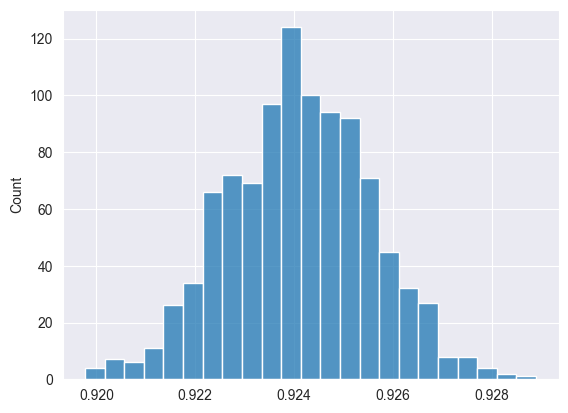

In [487]:
sns.histplot(boot_accuracies)

In [489]:
boot_sorted = list(sorted(boot_accuracies))
boot_sorted = boot_sorted[25:975]

In [495]:
print(f"Доверительный интервал: {round(boot_sorted[0], 7)}, {round(boot_sorted[1], 7)}")

Доверительный интервал: 0.9212504, 0.921312
